In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
plt.style.use('ggplot')

In [77]:
PATH_AIHWKIT = '/scratch/msc24h18/msc_project/results/test32/'
PATH_NEUROSIM = '/scratch/msc24h18/msc_project/results/test33/'

In [78]:
# get neurosim averag performance per device and pluse width
df_neurosim_1 = pd.read_csv(PATH_NEUROSIM + 'run_1.csv')
df_neurosim_2 = pd.read_csv(PATH_NEUROSIM + 'run_2.csv')

# Merge the dataframes and get average accuracy
df_neurosim = df_neurosim_1
df_neurosim['accuracy_2'] = df_neurosim_2['accuracy']
df_neurosim['accuracy'] = df_neurosim[['accuracy', 'accuracy_2']].mean(axis=1)
df_neurosim.drop(columns=['accuracy_2'], inplace=True)
df_neurosim = df_neurosim[['device_id', 'pulseWidth', 'accuracy']]

# get aihwkit data
df_aihwkit = pd.read_csv(PATH_AIHWKIT + 'no_out_scaling_wnstd_0.3.csv')
df_aihwkit = df_aihwkit[['device_id', 'pulseWidth', 'val_acc']]
df_aihwkit.rename(columns={'val_acc': 'accuracy'}, inplace=True)

print(df_neurosim.head())
print(df_aihwkit.head())

         device_id  pulseWidth  accuracy
0  ID180XR1000Star      0.0005    12.600
1          ID294YR      0.0005    60.185
2          ID294YR      0.0005    21.740
3          ID294YR      0.0005    21.600
4          ID294YR      0.0005    20.620
         device_id  pulseWidth  accuracy
0  ID180XR1000Star      0.0005  0.954917
1          ID294YR      0.0005  0.966250
2          ID294YR      0.0005  0.951333
3          ID294YR      0.0005  0.945417
4          ID294YR      0.0005  0.946250


In [79]:
def plot_relative_accuracy(df_merged):
    fig, ax = plt.subplots(figsize=(4, 8))
    ax2 = ax.twinx()

    colors = plt.cm.rainbow(np.linspace(0, 1, len(df_merged)))
    for i, row in df_merged.iterrows():
        coordsNeurosim = (1, row['rel_accuracy_neurosim'])
        coordsAihwkit = (2, row['rel_accuracy_aihwkit'])
        ax.plot(coordsNeurosim[0], coordsNeurosim[1], 'o', color=colors[i])
        ax2.plot(coordsAihwkit[0], coordsAihwkit[1], 'o', color=colors[i])
        conn = ConnectionPatch(coordsNeurosim, coordsAihwkit, 'data', 'data', axesA=ax, axesB=ax2, color=colors[i], lw=1)
        ax.add_artist(conn)

    ax.grid(False)
    ax2.grid(False)

    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Neurosim', 'Aihwkit'])

    ax.set(xlim=(0.9, 2.1))
    plt.show()

/tmp/ipykernel_3085696/1147445580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neurosim['rel_accuracy'] = df_neurosim['accuracy'] / max_acc_neurosim


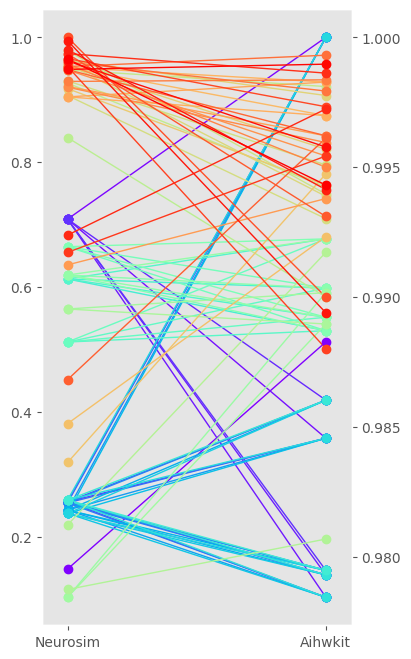

In [80]:
max_acc_neurosim = df_neurosim['accuracy'].max()
max_acc_aihwkit = df_aihwkit['accuracy'].max()

df_neurosim['rel_accuracy'] = df_neurosim['accuracy'] / max_acc_neurosim
df_aihwkit['rel_accuracy'] = df_aihwkit['accuracy'] / max_acc_aihwkit

df_merged = pd.merge(df_neurosim, df_aihwkit, on=['device_id', 'pulseWidth'], suffixes=('_neurosim', '_aihwkit'))
plot_relative_accuracy(df_merged)

In [35]:
# for each dataframe, merge all sets of device_id+pulseWidth together
df_neurosim = df_neurosim.groupby(['device_id', 'pulseWidth'], as_index=False).agg({'accuracy': 'mean'})
df_aihwkit = df_aihwkit.groupby(['device_id', 'pulseWidth'], as_index=False).agg({'accuracy': 'mean'})

print(df_neurosim.head())
print(df_aihwkit.head())

      device_id    pulseWidth  accuracy
0  ID161ZR15000  2.000000e-08   78.8275
1  ID161ZR15000  2.000000e-07   78.2300
2  ID161ZR15000  2.000000e-06   53.9600
3  ID161ZR15000  2.000000e-05   80.4750
4  ID161ZR15000  2.000000e-04   78.1250
      device_id    pulseWidth  accuracy
0  ID161ZR15000  2.000000e-08  0.963083
1  ID161ZR15000  2.000000e-07  0.962167
2  ID161ZR15000  2.000000e-06  0.959500
3  ID161ZR15000  2.000000e-05  0.959583
4  ID161ZR15000  2.000000e-04  0.960833


In [38]:
# get relative accuracy (1 is the best)
max_acc_neurosim = df_neurosim['accuracy'].max()
max_acc_aihwkit = df_aihwkit['accuracy'].max()

df_neurosim['rel_accuracy'] = df_neurosim['accuracy'] / max_acc_neurosim
df_aihwkit['rel_accuracy'] = df_aihwkit['accuracy'] / max_acc_aihwkit

print(df_neurosim.head())
print(df_aihwkit.head())

      device_id    pulseWidth  accuracy  rel_accuracy
0  ID161ZR15000  2.000000e-08   78.8275      0.928311
1  ID161ZR15000  2.000000e-07   78.2300      0.921274
2  ID161ZR15000  2.000000e-06   53.9600      0.635459
3  ID161ZR15000  2.000000e-05   80.4750      0.947712
4  ID161ZR15000  2.000000e-04   78.1250      0.920038
      device_id    pulseWidth  accuracy  rel_accuracy
0  ID161ZR15000  2.000000e-08  0.963083      0.997067
1  ID161ZR15000  2.000000e-07  0.962167      0.996118
2  ID161ZR15000  2.000000e-06  0.959500      0.993357
3  ID161ZR15000  2.000000e-05  0.959583      0.993443
4  ID161ZR15000  2.000000e-04  0.960833      0.994737


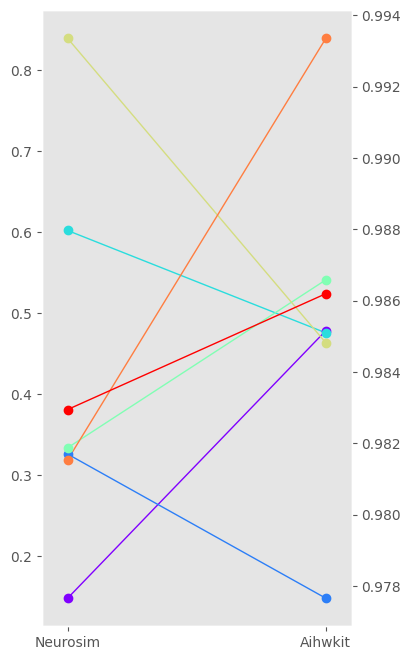

In [ ]:


# plot relative accuracy of both (only for pulswidth=0.0005)

df_neurosim_pw0 = df_neurosim[df_neurosim['pulseWidth'] == 0.0005]
df_aihwkit_pw0 = df_aihwkit[df_aihwkit['pulseWidth'] == 0.0005]

df_merged_pw0 = pd.merge(df_neurosim_pw0, df_aihwkit_pw0, on='device_id', suffixes=('_neurosim', '_aihwkit'))
plot_relative_accuracy(df_merged_pw0)